In [ ]:
#

In [296]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
#import datetime
from datetime import datetime

In [297]:
df_caby = pd.read_excel('/Users/srilathasirigala/Documents/Intern/CabData/DataSets/Cabydata.xlsx')
df_citi = pd.read_csv('/Users/srilathasirigala/Documents/Intern/CabData/DataSets/City.csv')
df_cust = pd.read_csv('/Users/srilathasirigala/Documents/Intern/CabData/DataSets/Customer_ID.csv')
df_tra = pd.read_csv('/Users/srilathasirigala/Documents/Intern/CabData/DataSets/Transaction_ID.csv')


In [298]:
df_caby.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-10,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-11,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-12,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [299]:
dfdate = df_caby.groupby('Company')
print(dfdate.last())

            Transaction ID Date of Travel           City  KM Travelled  \
Company                                                                  
Pink Cab          10437611     2018-12-31  WASHINGTON DC         29.68   
Yellow Cab        10440093     2018-12-31  WASHINGTON DC          4.32   

            Price Charged  Cost of Trip  
Company                                  
Pink Cab           388.08      302.7360  
Yellow Cab          60.41       55.4688  


In [300]:
df_caby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346700 entries, 0 to 346699
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  346700 non-null  int64         
 1   Date of Travel  346700 non-null  datetime64[ns]
 2   Company         346700 non-null  object        
 3   City            346700 non-null  object        
 4   KM Travelled    346700 non-null  float64       
 5   Price Charged   346700 non-null  float64       
 6   Cost of Trip    346700 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 18.5+ MB


In [301]:
df_citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [302]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [303]:
df_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [304]:
df_caby['Date of Travel'] = pd.to_datetime(df_caby['Date of Travel'])
df_caby = df_caby.rename(columns ={'Date of Travel': 'Date'})
df_caby.info

<bound method DataFrame.info of         Transaction ID       Date     Company           City  KM Travelled  \
0             10000011 2016-01-08    Pink Cab     ATLANTA GA         30.45   
1             10000012 2016-01-09    Pink Cab     ATLANTA GA         28.62   
2             10000013 2016-01-10    Pink Cab     ATLANTA GA          9.04   
3             10000014 2016-01-11    Pink Cab     ATLANTA GA         33.17   
4             10000015 2016-01-12    Pink Cab     ATLANTA GA          8.73   
...                ...        ...         ...            ...           ...   
346695        10439960 2018-12-31  Yellow Cab  WASHINGTON DC         33.93   
346696        10439984 2018-12-31  Yellow Cab  WASHINGTON DC         40.00   
346697        10440028 2018-12-31  Yellow Cab  WASHINGTON DC         26.22   
346698        10440034 2018-12-31  Yellow Cab  WASHINGTON DC         34.68   
346699        10440093 2018-12-31  Yellow Cab  WASHINGTON DC          4.32   

        Price Charged  Cost of 

In [305]:
JoinedData = df_caby.merge(df_tra, on= 'Transaction ID').merge(df_cust, on ='Customer ID').merge(df_citi, on = 'City')

In [306]:
MergeData=JoinedData.dropna()

In [307]:
MergeData.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.467000e+05,346700.000000,346700.000000,346700.000000,346700.000000,346700.000000,346700.000000
mean,1.022850e+07,22.563486,421.803841,286.066880,19137.463412,35.330358,15047.438699
std,1.223676e+05,12.232157,272.799700,157.944536,20980.836512,12.594697,7967.149392
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.012201e+07,12.000000,205.890000,151.200000,2689.000000,25.000000,8429.750000
50%,1.022897e+07,22.440000,385.240000,282.240000,7451.000000,33.000000,14680.000000
75%,1.033479e+07,32.960000,581.680000,413.586000,35844.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [308]:
MergeData.head(50)

,Transaction ID,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,2016-01-10,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


In [309]:
MergeData.isnull().sum()

Transaction ID        0
Date                  0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [310]:
for column in MergeData.columns:
    if ' ' in column:
        MergeData = MergeData.rename(columns={column:column.replace(' ','_')})
        
for column in ["Population","Users"] :
    
        MergeData[column] = MergeData[column].str.replace(',','')
        
MergeData.head(10)

,Transaction_ID,Date,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701
7,10000013,2016-01-10,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701


In [311]:
for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        MergeData[column] = MergeData[column].astype('category')
        
        
for column in ["Population", "Users" ] :
    
        MergeData[column] = MergeData[column].astype('int64')
        
print("\nFeature's datatypes\n\n{}".format(MergeData.dtypes))


Feature's datatypes

Transaction_ID                 int64
Date                  datetime64[ns]
Company                     category
City                        category
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income_(USD/Month)             int64
Population                     int64
Users                          int64
dtype: object


In [312]:
##converting the date format into standard date format
MergeData['Year'] = MergeData['Date'].dt.year
MergeData['Month'] = MergeData['Date'].dt.month
MergeData['Profit'] = MergeData['Price_Charged'] - MergeData['Cost_of_Trip']
MergeData['Profit_Rate'] = ((MergeData['Price_Charged'] - MergeData['Cost_of_Trip'])/MergeData['Cost_of_Trip'])*100

In [313]:
MergeData['Profit_Rate']

0         18.274427
1         88.612790
2         32.582415
3          7.067558
4         54.371732
            ...    
346695    30.642469
346696    25.996364
346697    17.920419
346698    32.661059
346699    11.008816
Name: Profit_Rate, Length: 346700, dtype: float64

Comparison of two Profit Rates of the company
Company   Pink Cab  Yellow Cab
Year                          
2016     27.447867   54.776774
2017     26.953767   56.772194
2018     21.429671   48.383983


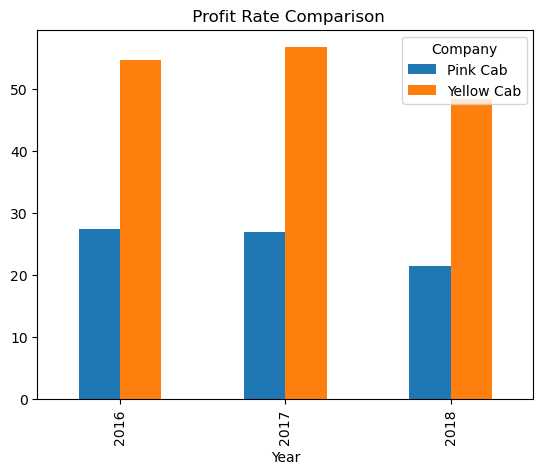

In [314]:
#Profit Rate Comparison

ProfitRate = MergeData.groupby(['Year','Company']).Profit.sum().unstack()/ MergeData.groupby(['Year','Company']).Cost_of_Trip.sum().unstack()*100
print("Comparison of two Profit Rates of the company")
print(ProfitRate)
ax = ProfitRate.plot(kind='bar',stacked = False, title = ' Profit Rate Comparison')
plt.show()

Text(0.5, 1.0, 'Population vs Users')

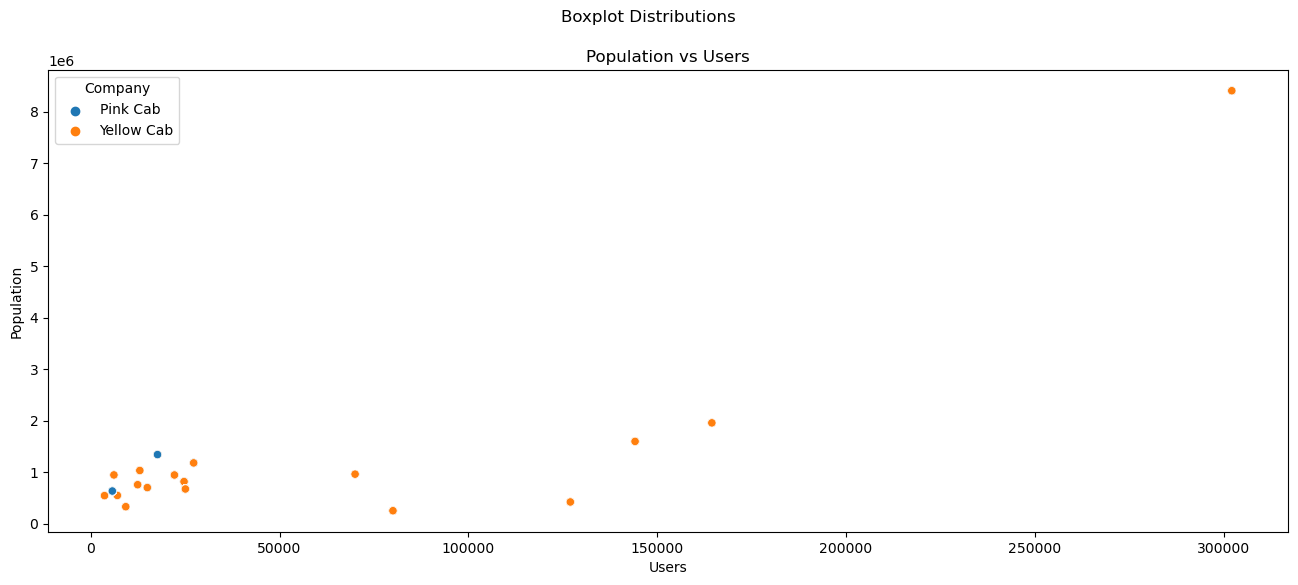

In [315]:
#Compnay Vs Users vs Populations
fig,axes = plt.subplots(figsize=(16, 6), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(data=MergeData, x='Users', y='Population' , hue="Company"  ).set_title("Population vs Users")

In [316]:

#Pink and Yellow Cab Firm Users Distribution over City

PinkCabC = MergeData[MergeData["Company"] == "Pink Cab"].groupby("City").count()
YellowCabC = MergeData[MergeData["Company"] == "Yellow Cab"].groupby("City").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=PinkCabC.index,
                    y=PinkCabC['Users'],
                    name='Pink Cab',
                    marker_color='Pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=YellowCabC.index,
                    y=YellowCabC['Users'],
                    name='Yellow Cab',
                    marker_color='Yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over City" )

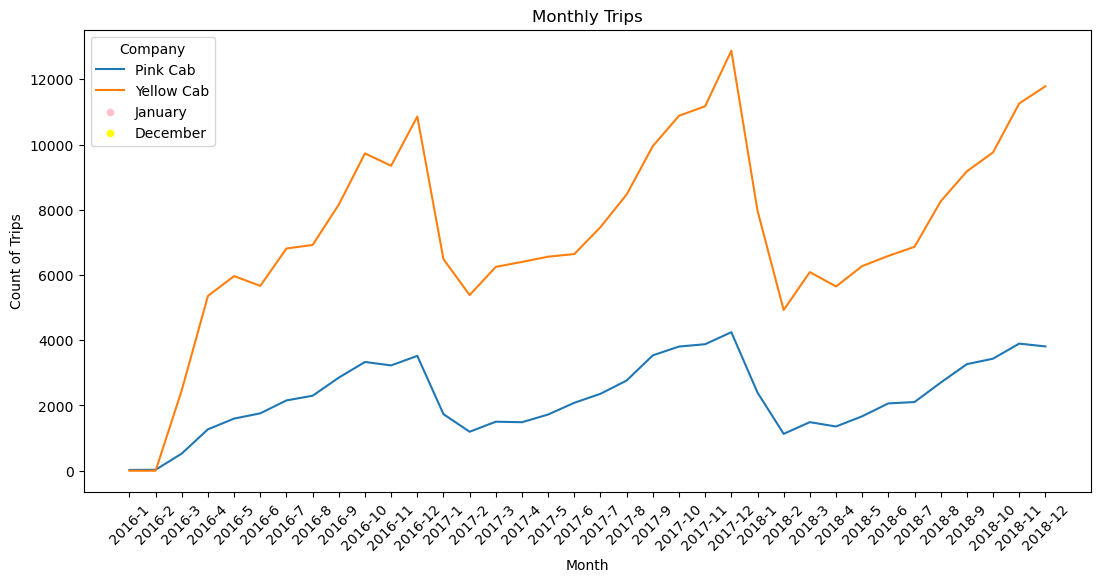

In [317]:
# month level trips
monthstats = MergeData.groupby(['Year', 'Month', 'Company']).size().reset_index().\
                                                    rename(columns = {0:'count'})
monthstats
monthstats['monthly'] = monthstats['Year'].astype('str') + "-" + monthstats['Month'].astype('str')
monthstats
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'monthly', y = 'count', data = monthstats, hue = 'Company')
for Month, name, color in zip([1,12], ['January', 'December'], ['pink', 'Yellow']):
    monthstats.query(f"Month == '{Month}'")[['monthly', 'count']].\
    plot.scatter(x = 'monthly', y = 'count', ax = ax, label = f'{name}', color = color);

plt.xticks(rotation = 45)
plt.title('Monthly Trips');
plt.xlabel('Month');
plt.ylabel('Count of Trips');


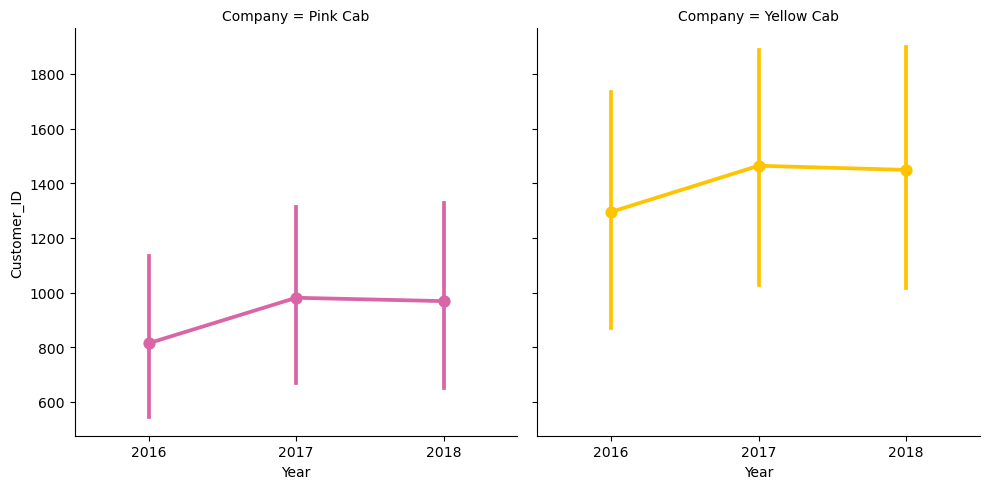

In [332]:
# Customer growth by company

yearlygrowth=MergeData.groupby(['Year','City', 'Company']).agg({'Customer_ID':'nunique'}).\
reset_index()
                                                                                   
yearlygrowth
sns.catplot(y ='Customer_ID', x = 'Year', col = 'Company', data = yearlygrowth, 
           kind = 'point', hue = 'Company', palette = palette);


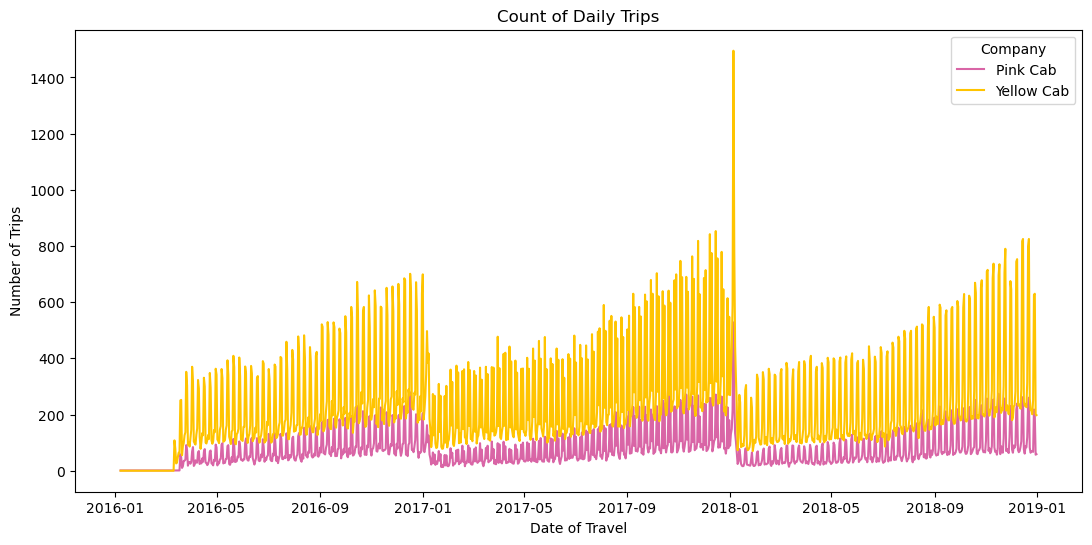

In [249]:

#Count of Daily Trips

Dailytrips = MergeData.groupby(['Date', 'Company']).size().reset_index().rename(columns = {0 : 'count'})

Dailytrips["day"] = Dailytrips.Date.dt.day_name()

palette = ['#d965a6', '#ffc400']
plt.figure(figsize = (13,6))
sns.lineplot(x = 'Date', y = 'count', data = Dailytrips, hue ='Company', 
             palette = palette);
plt.title('Count of Daily Trips');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');

<function matplotlib.pyplot.show(close=None, block=None)>

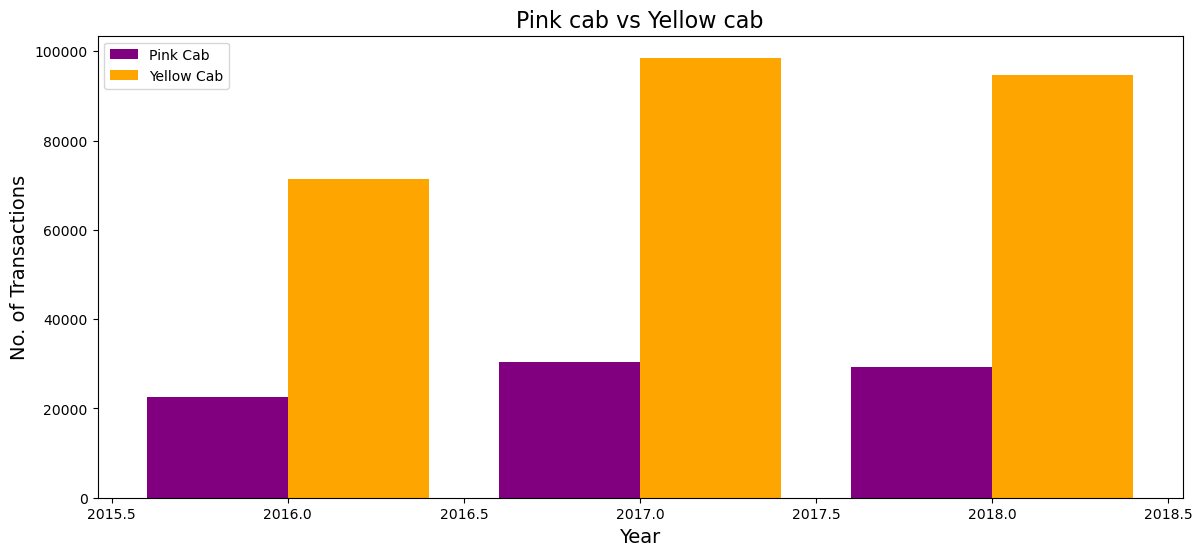

In [289]:
#Number Of Transactions

fig1 =MergeData[MergeData.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
fig2 = MergeData[MergeData.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(fig1.index-0.2,fig1.values, width=0.4, color='purple', align='center',label='Pink Cab')
ax.bar(fig2.index+0.2, fig2.values, width=0.4, color='Orange', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show

<AxesSubplot:xlabel='Income_(USD/Month)', ylabel='Count'>

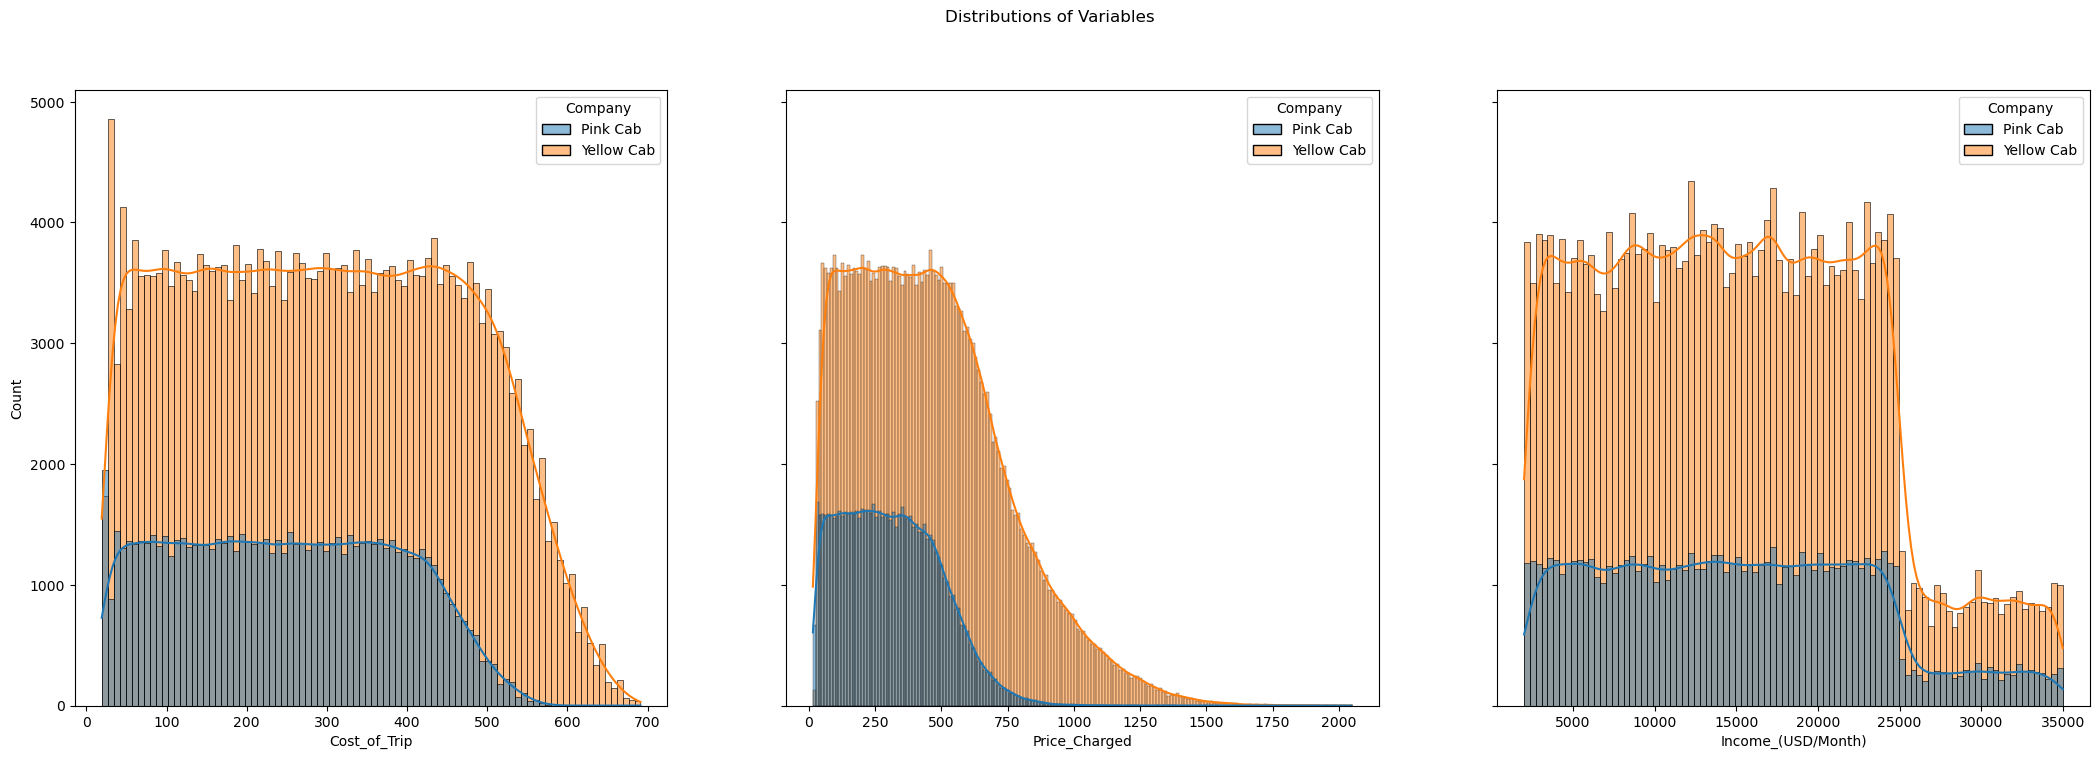

In [292]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 3 , figsize=(26,8), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=MergeData , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MergeData , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[2], data=MergeData , x='Income_(USD/Month)' , kde = True , hue="Company") 


#


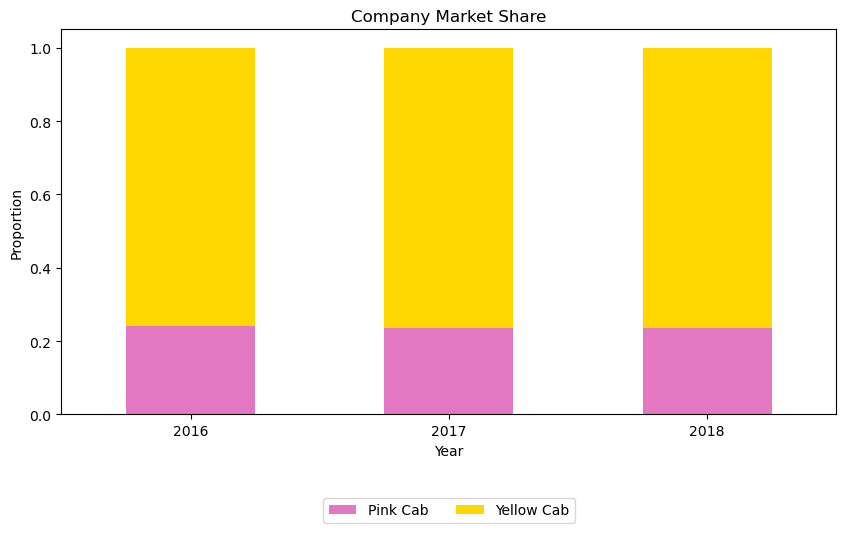

In [333]:
#MArket Share by company

pd.crosstab(index = MergeData.Year, columns = MergeData.Company, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = 'Company Market Share', color = ['tab:pink', 'gold'], 
    figsize = (10, 5), ylabel = 'Proportion').\
legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3));